## Agregación de datos por categoría

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
gender = ["Male", "Female"]
income = ["Poor", "Middle Class", "Rich"] #clase social

In [3]:
n = 500 # Tamaño del datasets
gender_data = []
income_data = []

for i in range(0, 500):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))
    
gender_data[1:10]

['Female', 'Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male']

In [4]:
income_data[1:10]

['Rich',
 'Middle Class',
 'Rich',
 'Poor',
 'Rich',
 'Middle Class',
 'Middle Class',
 'Middle Class',
 'Poor']

In [5]:
# Z = N (0,1)
# N (m,s) -> m + s * z
height = 160 + 30 * np.random.randn(n) # cm
weight = 65 + 20 * np.random.randn(n) # kg
age = 30 + 12 * np.random.randn(n)
salary = 18000 + 3500 * np.random.randn(n)

In [6]:
data = pd.DataFrame(
    {
        "Gender": gender_data,
        "Economic Status": income_data,
        "Height": height,
        "Weight": weight,
        "Age": age,
        "Income": salary
    }
)

In [7]:
data["Age"] = round(data["Age"], 0)
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Poor,132.861528,110.547497,44.0,20069.398241
1,Female,Rich,175.473871,104.564258,8.0,9555.214392
2,Male,Middle Class,198.460659,87.442877,26.0,17564.992623
3,Male,Rich,119.945981,39.065299,43.0,11794.842140
4,Male,Poor,156.493149,42.555982,21.0,20709.755832


## Agrupación de datos

In [8]:
grouped_gender = data.groupby("Gender") 
# No rompe los datos originales, sino que crea un objeto con dos atributos (nombre y grupo)
# Esto en basse al label o columna seleccionada (variable categorica)

In [9]:
grouped_gender.groups

{'Female': Int64Index([  1,   6,  10,  12,  16,  17,  21,  27,  28,  29,
             ...
             478, 482, 488, 490, 491, 493, 494, 495, 497, 499],
            dtype='int64', length=250),
 'Male': Int64Index([  0,   2,   3,   4,   5,   7,   8,   9,  11,  13,
             ...
             481, 483, 484, 485, 486, 487, 489, 492, 496, 498],
            dtype='int64', length=250)}

In [10]:
for names,groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status      Height      Weight   Age        Income
1    Female            Rich  175.473871  104.564258   8.0   9555.214392
6    Female    Middle Class  129.665315   61.721042  28.0  22065.814782
10   Female            Rich  235.577746   76.613573  19.0  19610.964750
12   Female            Poor  172.466712   42.174870  15.0  15857.131973
16   Female            Poor  125.259980  105.303026  33.0  17814.437668
17   Female            Rich  177.656332   48.916863  26.0  18200.382909
21   Female            Poor  176.399510   76.178952  41.0  17501.978749
27   Female            Rich  173.856918   80.075247  37.0   7923.370812
28   Female            Poor  158.998088   59.588770  38.0  13876.484096
29   Female            Rich  144.474002   57.607487  27.0  22595.966208
30   Female    Middle Class  126.084883   68.125725  25.0  27127.684586
31   Female            Poor  187.195131   79.976714  26.0  22567.748411
33   Female            Rich  225.033616   46.909111  42.0

In [11]:
grouped_gender.get_group("Female")
## Obtengo el data frame de mujeres

,Gender,Economic Status,Height,Weight,Age,Income
1,Female,Rich,175.473871,104.564258,8.0,9555.214392
6,Female,Middle Class,129.665315,61.721042,28.0,22065.814782
10,Female,Rich,235.577746,76.613573,19.0,19610.964750
12,Female,Poor,172.466712,42.174870,15.0,15857.131973
16,Female,Poor,125.259980,105.303026,33.0,17814.437668
17,Female,Rich,177.656332,48.916863,26.0,18200.382909
21,Female,Poor,176.399510,76.178952,41.0,17501.978749
27,Female,Rich,173.856918,80.075247,37.0,7923.370812
28,Female,Poor,158.998088,59.588770,38.0,13876.484096
29,Female,Rich,144.474002,57.607487,27.0,22595.966208


In [12]:
#Si quiero por mas de una categoria?
double_group = data.groupby(["Gender", "Economic Status"])

In [13]:
len(double_group)

6

In [14]:
for names,groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status      Height      Weight   Age        Income
6    Female    Middle Class  129.665315   61.721042  28.0  22065.814782
30   Female    Middle Class  126.084883   68.125725  25.0  27127.684586
36   Female    Middle Class  210.230051   67.264209  36.0  24867.270725
44   Female    Middle Class  164.054249   81.228533  20.0  12707.023217
48   Female    Middle Class  140.814727   64.313671  31.0  21878.623576
58   Female    Middle Class  175.346212   30.476022  20.0  18528.520465
62   Female    Middle Class  174.198841   47.272979  48.0  13262.968803
66   Female    Middle Class  145.270859   14.755678  49.0  20100.007426
69   Female    Middle Class  150.574354   82.918684  36.0  14020.932087
75   Female    Middle Class  171.566392   73.397864  28.0  13806.391285
83   Female    Middle Class  156.384207   73.251806   4.0  23740.612860
87   Female    Middle Class  116.061491   52.639092  17.0  23487.666136
88   Female    Middle Class  181.5149

## Operaciones sobre datos agrupados

In [15]:
double_group.sum()

Height       Weight     Age        Income
Gender Economic Status                                                 
Female Middle Class     14454.758935  5903.610272  2654.0  1.653829e+06
       Poor             11170.599392  4840.306681  2101.0  1.271582e+06
       Rich             14946.528694  5607.650705  2574.0  1.552193e+06
Male   Middle Class     15531.986287  6112.229306  2989.0  1.683351e+06
       Poor             11999.674244  4866.567740  2215.0  1.365434e+06
       Rich             12411.626090  5201.479522  2298.0  1.478958e+06

In [16]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     160.608433  65.595670  29.488889  18375.874779
       Poor             157.332386  68.173334  29.591549  17909.600105
       Rich             167.938525  63.007311  28.921348  17440.367072
Male   Middle Class     163.494592  64.339256  31.463158  17719.485876
       Poor             157.890451  64.033786  29.144737  17966.231981
       Rich             157.109191  65.841513  29.088608  18720.983366

In [17]:
double_group.size()

Gender  Economic Status
Female  Middle Class       90
        Poor               71
        Rich               89
Male    Middle Class       95
        Poor               76
        Rich               79
dtype: int64

In [18]:
double_group.describe()

Height                                                 \
                        count        mean        std         min         25%   
Gender Economic Status                                                         
Female Middle Class      90.0  160.608433  29.087776  101.781499  140.965392   
       Poor              71.0  157.332386  28.881682   75.400293  137.092168   
       Rich              89.0  167.938525  29.401108   99.942803  144.474002   
Male   Middle Class      95.0  163.494592  30.275478   43.936980  144.673466   
       Poor              76.0  157.890451  31.789903   81.989744  139.680899   
       Rich              79.0  157.109191  29.851545   84.248326  135.757094   

                                                           Weight             \
                               50%         75%         max  count       mean   
Gender Economic Status                                                         
Female Middle Class     161.441420  181.097721  233.605330   90.0  65.595670   
       Poor             157.799024  177.034494  223.773219   71.0  68.173334   
       Rich             166.909459  188.629578  235.577746   89.0  63.007311   
Male   Middle Class     164.613362  184.453844  222.157589   95.0  64.339256   
       Poor             154.738908  183.122117  227.381648   76.0  64.033786   
       Rich             157.503651  175.245184  230.488715   79.0  65.841513   

                        ...    Age       Income                             \
                        ...    75%   max  count          mean          std   
Gender Economic Status  ...                                                  
Female Middle Class     ...  38.75  59.0   90.0  18375.874779  3740.312155   
       Poor             ...  36.50  60.0   71.0  17909.600105  3408.647882   
       Rich             ...  37.00  49.0   89.0  17440.367072  3689.053799   
Male   Middle Class     ...  38.00  58.0   95.0  17719.485876  3422.837141   
       Poor             ...  35.50  62.0   76.0  17966.231981  3442.817295   
       Rich             ...  35.50  55.0   79.0  18720.983366  3802.974289   

                                                                  \
                                 min           25%           50%   
Gender Economic Status                                             
Female Middle Class      9859.980173  15406.137751  18633.281861   
       Poor             10712.717248  15173.918507  17949.093215   
       Rich              7923.370812  15147.535384  17745.726478   
Male   Middle Class      9291.044471  15424.592900  18055.885420   
       Poor              8327.196162  15447.508351  18234.828561   
       Rich             10367.059069  16430.553289  18575.732482   

                                                    
                                 75%           max  
Gender Economic Status                              
Female Middle Class     20869.742403  31360.689726  
       Poor             19910.098230  25132.186308  
       Rich             19595.299842  26816.010204  
Male   Middle Class     20204.550535  25214.149236  
       Poor             20413.969274  24943.438818  
       Rich             21020.468441  28593.855693  

[6 rows x 32 columns]

In [19]:
grouped_income = double_group["Income"]

In [20]:
grouped_income.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Middle Class      90.0  18375.874779  3740.312155   9859.980173   
       Poor              71.0  17909.600105  3408.647882  10712.717248   
       Rich              89.0  17440.367072  3689.053799   7923.370812   
Male   Middle Class      95.0  17719.485876  3422.837141   9291.044471   
       Poor              76.0  17966.231981  3442.817295   8327.196162   
       Rich              79.0  18720.983366  3802.974289  10367.059069   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     15406.137751  18633.281861  20869.742403  31360.689726  
       Poor             15173.918507  17949.093215  19910.098230  25132.186308  
       Rich             15147.535384  17745.726478  19595.299842  26816.010204  
Male   Middle Class     15424.592900  18055.885420  20204.550535  25214.149236  
       Poor             15447.508351  18234.828561  20413.969274  24943.438818  
       Rich             16430.553289  18575.732482  21020.468441  28593.855693

In [21]:
double_group.aggregate(
    {
        "Income": np.sum,
        "Age": np.mean,
        "Height": np.std
    }
)

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.653829e+06  29.488889  29.087776
       Poor             1.271582e+06  29.591549  28.881682
       Rich             1.552193e+06  28.921348  29.401108
Male   Middle Class     1.683351e+06  31.463158  30.275478
       Poor             1.365434e+06  29.144737  31.789903
       Rich             1.478958e+06  29.088608  29.851545

In [22]:
double_group.aggregate(
    {
        "Age": np.mean,
        "Height": lambda h: np.mean(h)/np.std(h)  
    }
)

Age    Height
Gender Economic Status                     
Female Middle Class     29.488889  5.552443
       Poor             29.591549  5.486253
       Rich             28.921348  5.744342
Male   Middle Class     31.463158  5.428880
       Poor             29.144737  4.999687
       Rich             29.088608  5.296647

In [23]:
double_group.aggregate([np.sum, np.mean, np.std])

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     14454.758935  160.608433  29.087776  5903.610272   
       Poor             11170.599392  157.332386  28.881682  4840.306681   
       Rich             14946.528694  167.938525  29.401108  5607.650705   
Male   Middle Class     15531.986287  163.494592  30.275478  6112.229306   
       Poor             11999.674244  157.890451  31.789903  4866.567740   
       Rich             12411.626090  157.109191  29.851545  5201.479522   

                                                 Age                        \
                             mean        std     sum       mean        std   
Gender Economic Status                                                       
Female Middle Class     65.595670  17.959034  2654.0  29.488889  12.809972   
       Poor             68.173334  17.057638  2101.0  29.591549  11.808686   
       Rich             63.007311  21.806626  2574.0  28.921348  11.078465   
Male   Middle Class     64.339256  19.531984  2989.0  31.463158  11.221949   
       Poor             64.033786  19.948504  2215.0  29.144737  12.098158   
       Rich             65.841513  17.365816  2298.0  29.088608  10.289639   

                              Income                             
                                 sum          mean          std  
Gender Economic Status                                           
Female Middle Class     1.653829e+06  18375.874779  3740.312155  
       Poor             1.271582e+06  17909.600105  3408.647882  
       Rich             1.552193e+06  17440.367072  3689.053799  
Male   Middle Class     1.683351e+06  17719.485876  3422.837141  
       Poor             1.365434e+06  17966.231981  3442.817295  
       Rich             1.478958e+06  18720.983366  3802.974289

In [24]:
double_group.aggregate([lambda x: np.mean(x)/np.std(x)])

Height    Weight       Age    Income
                        <lambda>  <lambda>  <lambda>  <lambda>
Gender Economic Status                                        
Female Middle Class     5.552443  3.672979  2.314923  4.940449
       Poor             5.486253  4.025092  2.523750  5.291562
       Rich             5.744342  2.905736  2.625383  4.754384
Male   Middle Class     5.428880  3.311521  2.818590  5.204305
       Poor             4.999687  3.231283  2.425030  5.253143
       Rich             5.296647  3.815670  2.845044  4.954177

## Filtrado de datos

In [25]:
double_group["Age"].filter(lambda x:x.sum()>2400)

1       8.0
2      26.0
6      28.0
7      39.0
8      37.0
10     19.0
11     24.0
14     29.0
17     26.0
27     37.0
29     27.0
30     25.0
33     42.0
36     36.0
37     43.0
42     15.0
43     37.0
44     20.0
46     38.0
48     31.0
50     28.0
53     30.0
54     42.0
55     28.0
58     20.0
61     44.0
62     48.0
63     25.0
64     34.0
65     28.0
       ... 
449    58.0
451    27.0
452     8.0
453    25.0
454    32.0
456    27.0
461    53.0
462    42.0
463    32.0
464    20.0
465    29.0
467    32.0
469    30.0
470    26.0
472    33.0
473    11.0
475    46.0
476    16.0
477    27.0
482    35.0
485    35.0
487    50.0
488    32.0
489    39.0
490    26.0
491    24.0
493    39.0
494    45.0
497    42.0
498    30.0
Name: Age, Length: 274, dtype: float64

## Transformación de variables

In [26]:
zscore = lambda x: (x - x.mean()/x.std())

In [27]:
z_group = double_group.transform(zscore)

(array([ 11.,  30.,  49.,  85., 117.,  84.,  61.,  43.,  13.,   7.]),
 array([-1.61059173,  4.50956519, 10.6297221 , 16.74987902, 22.87003593,
        28.99019285, 35.11034977, 41.23050668, 47.3506636 , 53.47082051,
        59.59097743]),
 <a list of 10 Patch objects>)

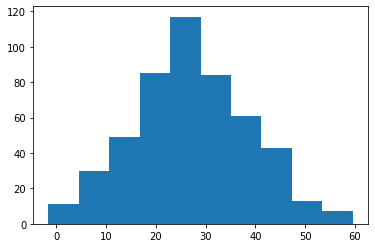

In [28]:
plt.hist(z_group["Age"])

In [29]:
fill_na_mean = lambda x : x.fillna(x.mean())

In [30]:
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,132.861528,110.547497,44.0,20069.398241
1,175.473871,104.564258,8.0,9555.214392
2,198.460659,87.442877,26.0,17564.992623
3,119.945981,39.065299,43.0,11794.842140
4,156.493149,42.555982,21.0,20709.755832
5,131.002838,49.015395,32.0,12736.691612
6,129.665315,61.721042,28.0,22065.814782
7,156.121243,32.638728,39.0,23196.664287
8,181.262032,75.480323,37.0,20788.070581
9,142.642211,62.352292,47.0,22248.325924


## Operaciones diversas muy útiles

In [31]:
double_group.head(1)
# El primero de cada grupo (primera fila u ocurrencia)

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Poor,132.861528,110.547497,44.0,20069.398241
1,Female,Rich,175.473871,104.564258,8.0,9555.214392
2,Male,Middle Class,198.460659,87.442877,26.0,17564.992623
3,Male,Rich,119.945981,39.065299,43.0,11794.842140
6,Female,Middle Class,129.665315,61.721042,28.0,22065.814782
12,Female,Poor,172.466712,42.174870,15.0,15857.131973


In [32]:
double_group.tail(1)
# El ultimo de cada grupo (ultima fila u ocurrencia)

,Gender,Economic Status,Height,Weight,Age,Income
486,Male,Rich,170.474743,54.091725,21.0,21117.694106
494,Female,Rich,174.575140,86.306969,45.0,14291.526315
496,Male,Poor,164.641570,31.270538,38.0,13479.175806
497,Female,Middle Class,124.035413,62.083355,42.0,18945.821901
498,Male,Middle Class,108.886714,56.947208,30.0,13979.886535
499,Female,Poor,162.505109,84.290647,59.0,12042.019691


In [33]:
double_group.nth(32) 
# El elemento x de cada grupo (elemento x fila u ocurrencia)

Height      Weight   Age        Income
Gender Economic Status                                            
Female Middle Class     209.081439   60.101275  41.0  22041.579140
       Poor             152.942710  108.494651  48.0  22836.791721
       Rich             169.934080   65.452684  21.0  19109.752311
Male   Middle Class     159.461768   81.897268  43.0  16312.831563
       Poor             146.553289   61.079682  26.0  13627.110082
       Rich             121.132827   57.110819  25.0  21213.739973

In [34]:
double_group.nth(82) 
# Hay que tener cuidado ya que puede ser que no exista el dato

Height     Weight   Age        Income
Gender Economic Status                                           
Female Middle Class     181.357578  70.627970  11.0  17839.527302
       Rich             160.382885  36.480473  42.0  12986.182298
Male   Middle Class     157.930863  61.301890  32.0  16513.755165

In [35]:
# Mas jóvenes?
data_sorted = data.sort_values(["Age", "Income"])
data_sorted.head(10)

,Gender,Economic Status,Height,Weight,Age,Income
384,Female,Rich,193.510715,67.542051,1.0,18560.642077
169,Female,Rich,208.834872,68.348426,3.0,18364.169429
34,Male,Poor,128.491323,77.361580,3.0,19778.918723
83,Female,Middle Class,156.384207,73.251806,4.0,23740.612860
67,Female,Poor,170.785494,57.780804,5.0,18625.897408
250,Female,Middle Class,137.034953,50.373268,5.0,18724.784363
238,Male,Poor,143.618878,91.068634,6.0,13754.748286
379,Female,Middle Class,148.353057,58.670067,6.0,18196.161203
217,Male,Poor,119.220130,27.995532,6.0,20275.642507
73,Male,Poor,196.919788,43.708650,6.0,24079.359926


In [36]:
age_grouped = data_sorted.groupby("Gender")
age_grouped.head(1)
## Hombre y mujer mas jóvenes

,Gender,Economic Status,Height,Weight,Age,Income
384,Female,Rich,193.510715,67.542051,1.0,18560.642077
34,Male,Poor,128.491323,77.361580,3.0,19778.918723


In [37]:
age_grouped.tail(1)
## Hombre y mujer mas viejos

,Gender,Economic Status,Height,Weight,Age,Income
259,Female,Poor,149.680269,52.909181,60.0,14549.895405
444,Male,Poor,227.381648,76.909434,62.0,16999.351015


## Conjunto de entrenamiento y conjunto de testing

In [38]:
## from sklearn.model_selection import train_test_split

In [2]:
mainpath = "D://Otros/machine-learning-data/python-ml-course/datasets/"
filename = "customer-churn-model/Customer Churn Model.txt"
fullpath = os.path.join(mainpath, filename)

In [3]:
data2 = pd.read_csv(fullpath)
len(data2)

3333

### Dividir utilizando la distribución normal

(array([ 10.,  55., 238., 621., 885., 817., 483., 184.,  35.,   5.]),
 array([-3.46300392, -2.75311762, -2.04323131, -1.333345  , -0.6234587 ,
         0.08642761,  0.79631392,  1.50620022,  2.21608653,  2.92597284,
         3.63585914]),
 <a list of 10 Patch objects>)

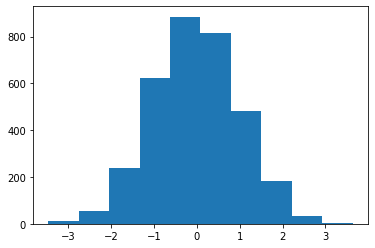

In [4]:
a = np.random.randn(len(data2))
plt.hist(a)

In [15]:
# se puede devidir a valores menores a un valor
check = a < 0.3
check = check.astype(np.float32) ## Si no hago esto, tira error por error con plt con array de boolean
check

array([1., 1., 1., ..., 1., 1., 0.], dtype=float32)

(array([1255.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2078.]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32), <a list of 10 Patch objects>)

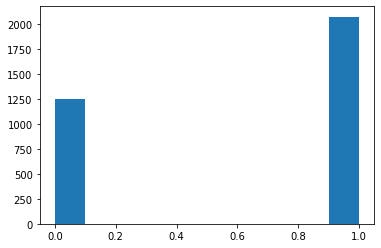

In [16]:
plt.hist(check)